In [1]:
import pandas as pd
import numpy as np

file_path = "../../data/processed/yp_kimos-maui-lahaina_rws_preprocessed.csv"
file_path = "../../data/processed/yp_kimos-maui-lahaina_rws_sentiment.csv"
# file_path = "../../data/raw/yp_competitors_rws.csv"
df = pd.read_csv(file_path)

In [2]:
from itertools import chain
import ast
# csv list fix with : ast
df.norm_tokens = df.norm_tokens.apply(lambda x: ast.literal_eval(x))
df.sent_tokens = df.sent_tokens.apply(lambda x: ast.literal_eval(x))
df.pos_tag = df.pos_tag.apply(lambda x: ast.literal_eval(x))
df.word_tokens = df.word_tokens.apply(lambda x: ast.literal_eval(x))

In [3]:
df.head()

,status,reviews,sent_tokens,word_tokens,pos_tag,norm_tokens,SGDClassifier,LogisticRegression,MultinomialNB
0,1,Kimo's never disappoints. We come here once o...,"[Kimo's never disappoints., We come here once ...","[Kimo, never, disappoints, We, come, here, onc...","[(Kimo, NNP), (never, RB), (disappoints, VBZ),...","[kimo, never, disappoint, come, everi, trip, m...",1,1,1
1,0,I was there the first week of October and Firs...,[I was there the first week of October and Fir...,"[I, was, there, the, first, week, of, October,...","[(I, PRP), (was, VBD), (there, RB), (the, DT),...","[first, week, octob, first, think, staff, wond...",0,0,1
2,1,"This place was on my ""Must Do Maui"" list and i...","[This place was on my ""Must Do Maui"" list and ...","[This, place, was, on, my, Must, Do, Maui, lis...","[(This, DT), (place, NN), (was, VBD), (on, IN)...","[place, must, maui, list, disappoint, must, co...",1,1,1
3,0,Monday night dinner here and they quickly sat ...,[Monday night dinner here and they quickly sat...,"[Monday, night, dinner, here, and, they, quick...","[(Monday, NNP), (night, NN), (dinner, NN), (he...","[monday, night, dinner, quickli, sat, group, u...",1,1,1
4,1,Nice view and amazing cocktails. They are loca...,"[Nice view and amazing cocktails., They are lo...","[Nice, view, and, amazing, cocktails, They, ar...","[(Nice, NNP), (view, NN), (and, CC), (amazing,...","[nice, view, amaz, cocktail, locat, right, lah...",1,1,1


## Bad Sentiment

In [27]:
import gensim
from gensim.corpora import Dictionary

data = df[df.SGDClassifier == 0].norm_tokens

dct = Dictionary(documents=data)
doc_term_matrix = [dct.doc2bow(doc) for doc in data]

In [28]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dct, passes=50)

In [29]:
ldamodel.show_topics(formatted=False, num_topics=4, num_words=8)

[(7,
  [('food', 0.013170909),
   ('reserv', 0.012963942),
   ('tabl', 0.012481661),
   ('view', 0.010594542),
   ('u', 0.010209658),
   ('order', 0.009206452),
   ('time', 0.009112759),
   ('seat', 0.008993858)]),
 (4,
  [('food', 0.019676236),
   ('place', 0.014595362),
   ('fish', 0.010837861),
   ('servic', 0.010774793),
   ('view', 0.008399862),
   ('good', 0.007767787),
   ('great', 0.007619102),
   ('get', 0.006643401)]),
 (0,
  [('drink', 0.015735244),
   ('water', 0.011600554),
   ('order', 0.011125913),
   ('food', 0.010888646),
   ('star', 0.0101080155),
   ('good', 0.010054725),
   ('fish', 0.0086845),
   ('salad', 0.008607972)]),
 (2,
  [('food', 0.01877921),
   ('good', 0.0140706105),
   ('u', 0.012591238),
   ('like', 0.011654579),
   ('place', 0.010118783),
   ('would', 0.009504773),
   ('time', 0.009485212),
   ('order', 0.009417807)])]

In [36]:
ldamodel.print_topics(num_topics=10, num_words=6)

[(0,
  '0.016*"drink" + 0.012*"water" + 0.011*"order" + 0.011*"food" + 0.010*"star" + 0.010*"good"'),
 (1,
  '0.013*"view" + 0.011*"drink" + 0.011*"star" + 0.010*"order" + 0.009*"rib" + 0.008*"good"'),
 (2,
  '0.019*"food" + 0.014*"good" + 0.013*"u" + 0.012*"like" + 0.010*"place" + 0.010*"would"'),
 (3,
  '0.021*"fish" + 0.014*"mahi" + 0.013*"kimo" + 0.012*"great" + 0.011*"servic" + 0.010*"food"'),
 (4,
  '0.020*"food" + 0.015*"place" + 0.011*"fish" + 0.011*"servic" + 0.008*"view" + 0.008*"good"'),
 (5,
  '0.022*"good" + 0.020*"food" + 0.016*"view" + 0.014*"place" + 0.011*"go" + 0.009*"back"'),
 (6,
  '0.033*"food" + 0.019*"fish" + 0.013*"restaur" + 0.013*"view" + 0.012*"good" + 0.012*"would"'),
 (7,
  '0.013*"food" + 0.013*"reserv" + 0.012*"tabl" + 0.011*"view" + 0.010*"u" + 0.009*"order"'),
 (8,
  '0.015*"good" + 0.012*"fish" + 0.012*"view" + 0.010*"back" + 0.010*"dinner" + 0.010*"menu"'),
 (9,
  '0.023*"tabl" + 0.015*"u" + 0.014*"order" + 0.012*"get" + 0.012*"restaur" + 0.011*"minut

## Good Sentiment

In [30]:
import gensim
from gensim.corpora import Dictionary

data = df[df.SGDClassifier == 1].norm_tokens

dct = Dictionary(documents=data)
doc_term_matrix = [dct.doc2bow(doc) for doc in data]

In [31]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_g = Lda(doc_term_matrix, num_topics=10, id2word = dct, passes=50)

In [33]:
ldamodel_g.show_topics(formatted=False, num_topics=4, num_words=8)

[(3,
  [('thing', 0.036333483),
   ('definit', 0.024832819),
   ('mud', 0.023434343),
   ('whole', 0.022401651),
   ('go', 0.020636775),
   ('version', 0.020536),
   ('cream', 0.01944762),
   ('nut', 0.019254936)]),
 (0,
  [('good', 0.038277593),
   ('maui', 0.026822215),
   ('happi', 0.020573765),
   ('great', 0.020485612),
   ('meal', 0.017246401),
   ('servic', 0.014806148),
   ('love', 0.01457709),
   ('friendli', 0.013841357)]),
 (2,
  [('best', 0.022226544),
   ('kimo', 0.01838823),
   ('ocean', 0.016363682),
   ('crust', 0.016209945),
   ('sit', 0.015821004),
   ('visit', 0.015614692),
   ('restaur', 0.01301303),
   ('got', 0.012672749)]),
 (1,
  [('rib', 0.024361359),
   ('back', 0.019435657),
   ('prime', 0.019142384),
   ('get', 0.017717276),
   ('u', 0.016318321),
   ('place', 0.014658534),
   ('bar', 0.013019672),
   ('drink', 0.01291097)])]

In [35]:
ldamodel_g.print_topics(num_topics=10, num_words=6)

[(0,
  '0.038*"good" + 0.027*"maui" + 0.021*"happi" + 0.020*"great" + 0.017*"meal" + 0.015*"servic"'),
 (1,
  '0.024*"rib" + 0.019*"back" + 0.019*"prime" + 0.018*"get" + 0.016*"u" + 0.015*"place"'),
 (2,
  '0.022*"best" + 0.018*"kimo" + 0.016*"ocean" + 0.016*"crust" + 0.016*"sit" + 0.016*"visit"'),
 (3,
  '0.036*"thing" + 0.025*"definit" + 0.023*"mud" + 0.022*"whole" + 0.021*"go" + 0.021*"version"'),
 (4,
  '0.046*"mahi" + 0.022*"rice" + 0.020*"dine" + 0.019*"view" + 0.018*"restaur" + 0.017*"delici"'),
 (5,
  '0.019*"fish" + 0.017*"great" + 0.016*"view" + 0.015*"place" + 0.014*"food" + 0.012*"order"'),
 (6,
  '0.065*"good" + 0.027*"fish" + 0.025*"coconut" + 0.022*"place" + 0.020*"view" + 0.020*"lunch"'),
 (7,
  '0.033*"fish" + 0.021*"good" + 0.020*"kimo" + 0.018*"place" + 0.017*"great" + 0.015*"lahaina"'),
 (8,
  '0.034*"pie" + 0.028*"hula" + 0.022*"time" + 0.021*"order" + 0.020*"dinner" + 0.014*"even"'),
 (9,
  '0.032*"great" + 0.026*"servic" + 0.023*"kimo" + 0.020*"view" + 0.020*"foo

## Other Things

In [58]:
ldamodel.get_topics().shape

(10, 5226)

In [37]:
ldamodel.get_term_topics('good')

[(2, 0.013989933),
 (3, 0.010071287),
 (5, 0.021612804),
 (6, 0.012078222),
 (8, 0.014196703)]

In [70]:
ldamodel.save('../../model/topic.model')

In [74]:
from gensim.models import LdaModel
loading = LdaModel.load('../../model/topic.model')
loading.print_topics(num_topics=2, num_words=5)

[(2, '0.017*"u" + 0.012*"place" + 0.012*"rib" + 0.012*"drink" + 0.011*"good"'),
 (5, '0.039*"fish" + 0.024*"mahi" + 0.023*"good" + 0.012*"rib" + 0.012*"got"')]

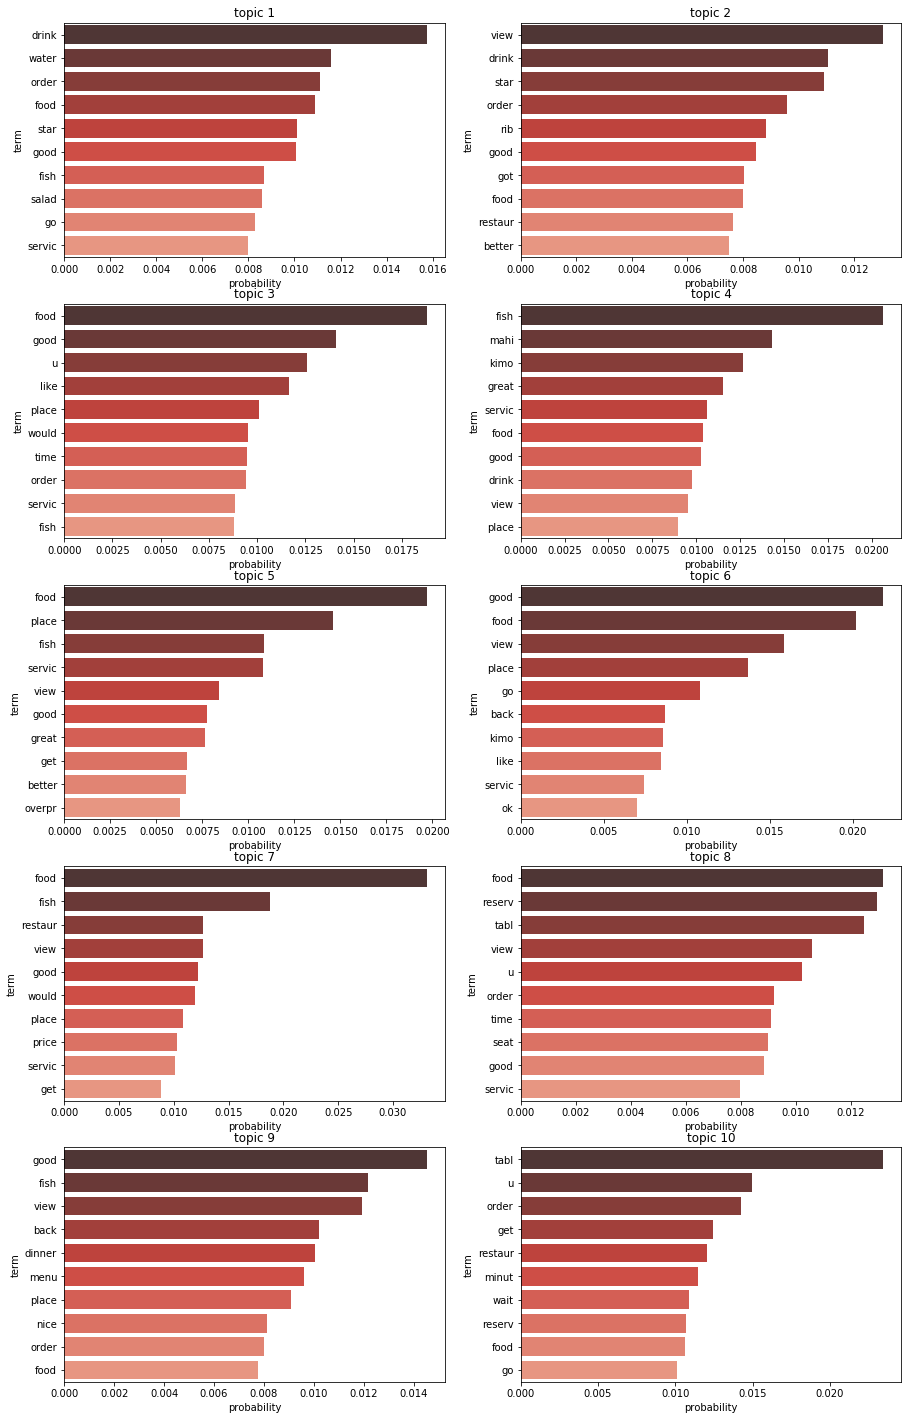

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fiz=plt.figure(figsize=(15, 25))
for i in range(10):
    df=pd.DataFrame(ldamodel.show_topic(i), columns=['term','prob']).set_index('term')
#     df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()